## PANDAS CHEAT SHEET

pandas is a Python package providing fast, flexible, and expressive data structures designed to work with relational or labeled data both. It is a fundamental high-level building block for doing practical, real world data analysis in Python.

In [2]:
import pandas as pd
import numpy as np

# Pandas Data  Structure

## Series


A Series is a single vector of data (like a NumPy array) with an index that labels each element in the vector.

 s = pd.Series(data, index=index)
 data can be many different things:
 a Python dict
 an ndarray
 a scalar value (like 5)

In [42]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
print(s)

a    1.035711
b   -0.465305
c    0.650014
d    1.604866
e   -0.955521
dtype: float64


In [7]:
c=pd.Series([630,25,26,255])
print(c)

0    630
1     25
2     26
3    255
dtype: int64


If an index is not specified, a default sequence of integers is assigned as the index. A NumPy array comprises the values of the Series, while the index is a pandas Index object.

In [9]:
c.values

array([630,  25,  26, 255])

In [10]:
c.index

RangeIndex(start=0, stop=4, step=1)

In [17]:
#assigning meanngful indexes
points=pd.Series([630,25,26,255],
    index=['India','Bangladesh','Pakistan','China'])
print(points)

India         630
Bangladesh     25
Pakistan       26
China         255
dtype: int64


In [18]:
#refering values using labels
points['India']

630

In [20]:
points[[p.endswith("a") for p in points.index]]

India    630
China    255
dtype: int64

In [22]:
[p.endswith("a") for p in points.index]

[True, False, False, True]

In [23]:
#we can still use default indexing style
points[0]

630

In [24]:
#giving the values and index itelf a label
points.name="WorldCup"
points.index.name="Previous Points"
points


Previous Points
India         630
Bangladesh     25
Pakistan       26
China         255
Name: WorldCup, dtype: int64

In [25]:
#applying nupy math functions without losing datastructure
np.log(points)

Previous Points
India         6.445720
Bangladesh    3.218876
Pakistan      3.258097
China         5.541264
Name: WorldCup, dtype: float64

In [26]:
#filtering values
points[points>100]
# A series is an ordered key-value store

Previous Points
India    630
China    255
Name: WorldCup, dtype: int64

points < 1000 returns a Series of True/False values, which we then pass to our Series points, returning the corresponding True items.


In [37]:
#creating a serie from a dicionary
points_dic={"India":345,"Bangladesh":456,"Pakistan":789,"China":90}
points=pd.Series(points_dic)
points
#will be created in key sorted order

Bangladesh    456
China          90
India         345
Pakistan      789
dtype: int64

If we pass a custom index to Series, it will select the corresponding values from the dict, and treat indices without corrsponding values as missing. Pandas uses the NaN (not a number) type for missing values.

In [38]:
points2=pd.Series(points_dic,index=["Spain","India","China","France"])
points2

Spain       NaN
India     345.0
China      90.0
France      NaN
dtype: float64

In [39]:
points2.isnull()

Spain      True
India     False
China     False
France     True
dtype: bool

In [47]:
print(points)
print(points2)
print(points+points2)
#u can drop missing values by using dropna
(points+points2).dropna()

Bangladesh    456
China          90
India         345
Pakistan      789
dtype: int64
Spain       NaN
India     345.0
China      90.0
France      NaN
dtype: float64
Bangladesh      NaN
China         180.0
France          NaN
India         690.0
Pakistan        NaN
Spain           NaN
dtype: float64


China    180.0
India    690.0
dtype: float64

You can add two Series together, which returns a union of the two Series with the addition occurring on the shared index values. Values on either Series that did not have a shared index will produce a NULL/NaN (not a number).

## DATAFRAME

Inevitably, we want to be able to store, view and manipulate data that is multivariate, where for every index there are multiple fields or columns of data, often of varying data type.

A DataFrame is a tabular data structure, encapsulating multiple series like columns in a spreadsheet. Data are stored internally as a 2-dimensional object, but the DataFrame allows us to represent and manipulate higher-dimensional data.

In [51]:
data=pd.DataFrame({'points':[632, 1638, 569, 115],
                   'team':['India','China','Pakistan','Bhutan'],
                   'captain':['Suresh','Ramesh','Kamlesh','Dharmesh']
                  })
print(data)

    captain  points      team
0    Suresh     632     India
1    Ramesh    1638     China
2   Kamlesh     569  Pakistan
3  Dharmesh     115    Bhutan


Notice the DataFrame is sorted by column name. We can change the order by indexing them in the order we desire:

In [52]:
data[['team','captain','points']]

,team,captain,points
0,India,Suresh,632
1,China,Ramesh,1638
2,Pakistan,Kamlesh,569
3,Bhutan,Dharmesh,115


In [53]:
#A DataFrame has a second index, representing the columns:
data.columns

Index(['captain', 'points', 'team'], dtype='object')

In [54]:
#The dtypes attribute reveals the data type for each column in our DataFrame.
data.dtypes

captain    object
points      int64
team       object
dtype: object

object refers to strings(letters and numbers)

In [58]:
#accessing columns
data['team']
#or
data.team

0       India
1       China
2    Pakistan
3      Bhutan
Name: team, dtype: object

In [62]:
print(type(data.points))
data[['points']]
#prints a column

<class 'pandas.core.series.Series'>


,points
0,632
1,1638
2,569
3,115


In [68]:
#accesing rows in a dataFrame
data.loc[3]
#see the square brackets
data.head()
data.tail(3)
data.shape

(4, 3)

In [5]:
#An alternative way of initializing a DataFrame is with a list of dicts:
data = pd.DataFrame([{'patient': 1, 'phylum': 'Firmicutes', 'value': 632},
                    {'patient': 1, 'phylum': 'Proteobacteria', 'value': 1638},
                    {'patient': 1, 'phylum': 'Actinobacteria', 'value': 569},
                    {'patient': 1, 'phylum': 'Bacteroidetes', 'value': 115},
                    {'patient': 2, 'phylum': 'Firmicutes', 'value': 433},
                    {'patient': 2, 'phylum': 'Proteobacteria', 'value': 1130},
                    {'patient': 2, 'phylum': 'Actinobacteria', 'value': 754},
                    {'patient': 2, 'phylum': 'Bacteroidetes', 'value': 555}])
data


,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,1130
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


In [7]:
#this returns a view of the data frame
vals = data.value
vals
vals[5] = 0
vals

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0     632
1    1638
2     569
3     115
4     433
5       0
6     754
7     555
Name: value, dtype: int64

In [8]:
vals = data.value.copy()
vals[5] = 1000
data

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,0
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


In [15]:
data['year'] = 2013
data

,patient,phylum,value,year
0,1,Firmicutes,632,2013
1,1,Proteobacteria,1638,2013
2,1,Actinobacteria,569,2013
3,1,Bacteroidetes,115,2013
4,2,Firmicutes,433,2013
5,2,Proteobacteria,0,2013
6,2,Actinobacteria,754,2013
7,2,Bacteroidetes,555,2013


In [22]:
#From the data table above, create an index to return all rows for which the 
#Phylum name ends in "bacteria" and the value is greater than 1000.
data[(data.phylum.str.endswith('bacteria')) & (data.value>1000)]

,patient,phylum,value,year
1,1,Proteobacteria,1638,2013


Specifying a Series as a new columns cause its values to be added according to the DataFrame's index:

In [29]:
treatment = pd.Series([0]*4+[1]*2)#INDEX
treatment
data['treatment'] = treatment
data

,patient,phylum,value,year,treatment
0,1,Firmicutes,632,2013,0.0
1,1,Proteobacteria,1638,2013,0.0
2,1,Actinobacteria,569,2013,0.0
3,1,Bacteroidetes,115,2013,0.0
4,2,Firmicutes,433,2013,1.0
5,2,Proteobacteria,0,2013,1.0
6,2,Actinobacteria,754,2013,NaN
7,2,Bacteroidetes,555,2013,NaN


Other Python data structures (ones without an index) need to be the same length as the DataFrame:

In [30]:
data['month'] = ['Jan']*len(data)
data

,patient,phylum,value,year,treatment,month
0,1,Firmicutes,632,2013,0.0,Jan
1,1,Proteobacteria,1638,2013,0.0,Jan
2,1,Actinobacteria,569,2013,0.0,Jan
3,1,Bacteroidetes,115,2013,0.0,Jan
4,2,Firmicutes,433,2013,1.0,Jan
5,2,Proteobacteria,0,2013,1.0,Jan
6,2,Actinobacteria,754,2013,NaN,Jan
7,2,Bacteroidetes,555,2013,NaN,Jan


In [34]:
data.drop('month',axis=1)


,patient,phylum,value,year,treatment
0,1,Firmicutes,632,2013,0.0
1,1,Proteobacteria,1638,2013,0.0
2,1,Actinobacteria,569,2013,0.0
3,1,Bacteroidetes,115,2013,0.0
4,2,Firmicutes,433,2013,1.0
5,2,Proteobacteria,0,2013,1.0
6,2,Actinobacteria,754,2013,NaN
7,2,Bacteroidetes,555,2013,NaN


In [37]:
#gives all the row as a ndarray
print(type(data.values))
data.values

<class 'numpy.ndarray'>


array([[1, 'Firmicutes', 632, 2013, 0.0, 'Jan'],
       [1, 'Proteobacteria', 1638, 2013, 0.0, 'Jan'],
       [1, 'Actinobacteria', 569, 2013, 0.0, 'Jan'],
       [1, 'Bacteroidetes', 115, 2013, 0.0, 'Jan'],
       [2, 'Firmicutes', 433, 2013, 1.0, 'Jan'],
       [2, 'Proteobacteria', 0, 2013, 1.0, 'Jan'],
       [2, 'Actinobacteria', 754, 2013, nan, 'Jan'],
       [2, 'Bacteroidetes', 555, 2013, nan, 'Jan']], dtype=object)

In [40]:
#index objects are immutable
data.index[0] = 15

TypeError: Index does not support mutable operations

In [41]:
#getting summary of large dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
patient      8 non-null int64
phylum       8 non-null object
value        8 non-null int64
year         8 non-null int64
treatment    6 non-null float64
month        8 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 464.0+ bytes


## Importing Data<br>CSV means Comma Separated Values

In [20]:
#you can get this from https://www.kaggle.com/egrinstein/20-years-of-games
#contains reviews about witcher 3
import pandas as pd
reviews=pd.read_csv("ign.csv")
reviews.head()

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


Notice that read_csv automatically considered the first row in the file to be a header row.
<br>
We can override default behavior by customizing some the arguments, like header, names or index_col.
<br>
pd.read_csv("ign.csv", header=None).head()

In [21]:
reviews=pd.read_table("ign.csv", sep=',')
reviews.head()

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


The sep argument can be customized as needed to accomodate arbitrary separators. For example, we can use a regular expression to define a variable amount of whitespace, which is unfortunately very common in some data formats:

sep='\s+'

For a more useful index, we can specify the first two columns, which together provide a unique index to the data.

In [22]:
reviews.info()
#hierarchical Indexing
reviews=pd.read_csv("ign.csv",index_col=['Unnamed: 0','score_phrase'])
reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18625 entries, 0 to 18624
Data columns (total 11 columns):
Unnamed: 0        18625 non-null int64
score_phrase      18625 non-null object
title             18625 non-null object
url               18625 non-null object
platform          18625 non-null object
score             18625 non-null float64
genre             18589 non-null object
editors_choice    18625 non-null object
release_year      18625 non-null int64
release_month     18625 non-null int64
release_day       18625 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 1.6+ MB


,,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
,score_phrase,,,,,,,,,
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


If we have sections of data that we do not wish to import (for example, known bad data), we can populate the skiprows argument:

In [23]:
pd.read_csv("ign.csv",skiprows=[0]).head()

,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
0,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
2,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
3,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11
4,5,Good,Total War Battles: Shogun,/games/total-war-battles-shogun/mac-142565,Macintosh,7.0,Strategy,N,2012,9,11


If we only want to import a small number of rows from, say, a very large data file we can use nrows:
<br>
Alternately, if we want to process our data in reasonable chunks, the chunksize argument will return an iterable object that can be employed in a data processing loop.

In [24]:
pd.read_csv("ign.csv",nrows=4)

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11


In [34]:
chunk_review=pd.read_csv("ign.csv",chunksize=14)
r=pd.Series({chunk.iloc[0].title:chunk.score for chunk in chunk_review})
r

102 Dalmatians: Puppies to the Rescue            2898    6.0
2899    6.6
2900    5.8
2901    3....
1602 A.D.                                        2002     7.9
2003     6.0
2004     5.0
2005   ...
1701 A.D.                                        8456    8.2
8457    5.0
8458    7.8
8459    3....
18-Wheeler American Pro Trucker                  3696    5.0
3697    6.3
3698    7.9
3699    5....
1942                                             7714    4.5
7715    4.8
7716    6.8
7717    7....
24: Special Ops                                  12740    7.2
12741    7.9
12742    5.0
12743  ...
3 on 3 NHL Arcade                                12460    5.9
12461    8.0
12462    4.0
12463  ...
300                                              9072    8.0
9073    7.3
9074    7.8
9075    6....
3D Classics: Urban Champion                      16016    2.5
16017    6.0
16018    7.5
16019  ...
3D Hunting Trophy Whitetail Championship 2009    12782    7.9
12783    7.0
12784    8.0
12785  ...
3D Pixel R

In [31]:
pd.isnull(reviews).head()

,,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
,score_phrase,,,,,,,,,
0,Amazing,False,False,False,False,False,False,False,False,False
1,Amazing,False,False,False,False,False,False,False,False,False
2,Great,False,False,False,False,False,False,False,False,False
3,Great,False,False,False,False,False,False,False,False,False
4,Great,False,False,False,False,False,False,False,False,False


In [ ]:
#importing from microsoft excel
excel=pd.rea_excel("File Name")

# Pandas Fundamental

In [42]:
#Football International Friendlies data
results=pd.read_csv("results.csv")
results.tail()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
39003,2018-06-04,Italy,Netherlands,1,1,Friendly,Turin,Italy,False
39004,2018-06-04,Serbia,Chile,0,1,Friendly,Graz,Austria,True
39005,2018-06-04,Slovakia,Morocco,1,2,Friendly,Geneva,Switzerland,True
39006,2018-06-04,Armenia,Moldova,0,0,Friendly,Kematen,Austria,True
39007,2018-06-04,India,Kenya,3,0,Friendly,Mumbai,India,False


In [48]:
team_unique=results.date.astype(str)+results.home_team+results.away_team
result_copy=results.copy()
result_copy.index=team_unique
result_copy.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1872-11-30ScotlandEngland,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1873-03-08EnglandScotland,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
1874-03-07ScotlandEngland,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
1875-03-06EnglandScotland,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
1876-03-04ScotlandEngland,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [49]:
result_copy.index.is_unique

False

### Manipulating indices

Reindexing allows users to manipulate the data labels in a DataFrame. It forces a DataFrame to conform to the new index, and optionally, fill in missing data if requested.
<br>
A simple use of reindex is to alter the order of the rows:

In [50]:
results.reindex(results.index[::-1]).head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
39007,2018-06-04,India,Kenya,3,0,Friendly,Mumbai,India,False
39006,2018-06-04,Armenia,Moldova,0,0,Friendly,Kematen,Austria,True
39005,2018-06-04,Slovakia,Morocco,1,2,Friendly,Geneva,Switzerland,True
39004,2018-06-04,Serbia,Chile,0,1,Friendly,Graz,Austria,True
39003,2018-06-04,Italy,Netherlands,1,1,Friendly,Turin,Italy,False


In [52]:
id_range=range(results.index.values.min(),results.index.values.max())
results.reindex(id_range).head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


We could specify and index that is a sequence from the first to the last id numbers in the database, and Pandas would fill in the missing data with NaN values:
Keep in mind that reindex does not work if we pass a non-unique index series.


Indexing and Selection

In [61]:
# Getting Unique Values Across Multiple Columns in a Pandas Dataframe
teams=pd.unique(results[['home_team','away_team']].values.ravel())
teams

array(['Scotland', 'England', 'Wales', 'Northern Ireland', 'USA',
       'Canada', 'Uruguay', 'Argentina', 'Austria', 'Hungary',
       'Czechoslovakia', 'Belgium', 'France', 'Switzerland',
       'Netherlands', 'Germany', 'Sweden', 'Norway', 'Italy', 'Chile',
       'Finland', 'Luxembourg', 'Russia', 'Denmark', 'Brazil', 'Japan',
       'Philippines', 'Paraguay', 'Estonia', 'Costa Rica', 'El Salvador',
       'Guatemala', 'Yugoslavia', 'Poland', 'Spain', 'Portugal',
       'Romania', 'New Zealand', 'Australia', 'Latvia', 'Mexico', 'China',
       'Lithuania', 'Turkey', 'Aruba', 'Curaçao', 'Bulgaria', 'Egypt',
       'South Africa', 'Haiti', 'Jamaica', 'Ireland', 'Kenya', 'Uganda',
       'Bolivia', 'Peru', 'Honduras', 'Guyana', 'Trinidad and Tobago',
       'Belarus', 'Ukraine', 'Barbados', 'Nicaragua', 'Greece',
       'Martinique', 'Dominica', 'Cuba', 'Guadeloupe', 'Israel',
       'Indonesia', 'Suriname', 'French Guyana', 'St. Lucia', 'Ecuador',
       'Colombia', 'Venezuela', 'St.

The DataFrame.index and DataFrame.columns are placed in the query namespace by default. If you want to refer to a variable in the current namespace, you can prefix the variable with @:

In [66]:
min_home_score =2

For a more concise (and readable) syntax, we can use the new query method to perform selection on a DataFrame. Instead of having to type the fully-specified column, we can simply pass a string that describes what to select.

In [65]:
results.query('home_score > @min_home_score')

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False
11,1879-04-05,England,Scotland,5,4,Friendly,London,England,False
13,1880-03-13,Scotland,England,5,4,Friendly,Glasgow,Scotland,False
15,1880-03-27,Scotland,Wales,5,1,Friendly,Glasgow,Scotland,False
20,1882-02-25,Wales,Northern Ireland,7,1,Friendly,Wrexham,Wales,False
21,1882-03-11,Scotland,England,5,1,Friendly,Glasgow,Scotland,False


### Operations

In [74]:
hs2017=results.loc[results.date>"2017-01-01",'date']
hs2018=results.loc[results.date>"2018-01-01",'date']
hstotal=hs2017+hs2018
hstotal

37911                     NaN
37912                     NaN
37913                     NaN
37914                     NaN
37915                     NaN
37916                     NaN
37917                     NaN
37918                     NaN
37919                     NaN
37920                     NaN
37921                     NaN
37922                     NaN
37923                     NaN
37924                     NaN
37925                     NaN
37926                     NaN
37927                     NaN
37928                     NaN
37929                     NaN
37930                     NaN
37931                     NaN
37932                     NaN
37933                     NaN
37934                     NaN
37935                     NaN
37936                     NaN
37937                     NaN
37938                     NaN
37939                     NaN
37940                     NaN
                 ...         
38978    2018-06-012018-06-01
38979    2018-06-022018-06-02
38980    2

Pandas' data alignment places NaN values for labels that do not overlap in the two Series

In [77]:
hstotal[hstotal.notnull()]

38767    2018-01-022018-01-02
38768    2018-01-022018-01-02
38769    2018-01-052018-01-05
38770    2018-01-072018-01-07
38771    2018-01-112018-01-11
38772    2018-01-112018-01-11
38773    2018-01-112018-01-11
38774    2018-01-142018-01-14
38775    2018-01-272018-01-27
38776    2018-01-282018-01-28
38777    2018-01-302018-01-30
38778    2018-01-302018-01-30
38779    2018-01-312018-01-31
38780    2018-02-032018-02-03
38781    2018-02-262018-02-26
38782    2018-02-282018-02-28
38783    2018-03-172018-03-17
38784    2018-03-212018-03-21
38785    2018-03-212018-03-21
38786    2018-03-212018-03-21
38787    2018-03-212018-03-21
38788    2018-03-212018-03-21
38789    2018-03-212018-03-21
38790    2018-03-212018-03-21
38791    2018-03-212018-03-21
38792    2018-03-212018-03-21
38793    2018-03-222018-03-22
38794    2018-03-222018-03-22
38795    2018-03-222018-03-22
38796    2018-03-222018-03-22
                 ...         
38978    2018-06-012018-06-01
38979    2018-06-022018-06-02
38980    2

In [80]:
# We can also apply functions to each column or row of a DataFrame
import numpy as np
result=results.home_score
result.apply(np.median)

0        0.0
1        4.0
2        2.0
3        2.0
4        3.0
5        4.0
6        1.0
7        0.0
8        7.0
9        9.0
10       2.0
11       5.0
12       0.0
13       5.0
14       2.0
15       5.0
16       0.0
17       1.0
18       1.0
19       0.0
20       7.0
21       5.0
22       5.0
23       5.0
24       5.0
25       7.0
26       2.0
27       0.0
28       1.0
29       0.0
        ... 
38978    5.0
38979    1.0
38980    0.0
38981    2.0
38982    0.0
38983    1.0
38984    0.0
38985    2.0
38986    0.0
38987    2.0
38988    2.0
38989    2.0
38990    0.0
38991    1.0
38992    1.0
38993    2.0
38994    1.0
38995    0.0
38996    1.0
38997    0.0
38998    3.0
38999    0.0
39000    0.0
39001    0.0
39002    1.0
39003    1.0
39004    0.0
39005    1.0
39006    0.0
39007    3.0
Name: home_score, Length: 39008, dtype: float64

### Sorting and Rannking

In [89]:
results.sort_index().head()
results.sort_index(ascending=False).head()
#sorting columns
results.sort_index(axis=1).head()
#sorting a Series by value
result.sort_values()
results[['home_score','away_score','home_team']].sort_values(ascending=[False,True],by=['home_score','away_score']).head()

,home_score,away_score,home_team
23569,31,0,Australia
10860,24,0,Fiji
23566,22,0,Australia
22344,20,0,Kuwait
22257,19,0,China


Ranking does not re-arrange data, but instead returns an index that ranks each value relative to others in the Series.

In [92]:
results.home_score.rank(ascending=False)

0        34333.5
1         3678.5
2        13780.5
3        13780.5
4         7153.0
5         3678.5
6        23884.0
7        34333.5
8          600.5
9          207.0
10       13780.5
11        1939.5
12       34333.5
13        1939.5
14       13780.5
15        1939.5
16       34333.5
17       23884.0
18       23884.0
19       34333.5
20         600.5
21        1939.5
22        1939.5
23        1939.5
24        1939.5
25         600.5
26       13780.5
27       34333.5
28       23884.0
29       34333.5
          ...   
38978     1939.5
38979    23884.0
38980    34333.5
38981    13780.5
38982    34333.5
38983    23884.0
38984    34333.5
38985    13780.5
38986    34333.5
38987    13780.5
38988    13780.5
38989    13780.5
38990    34333.5
38991    23884.0
38992    23884.0
38993    13780.5
38994    23884.0
38995    34333.5
38996    23884.0
38997    34333.5
38998     7153.0
38999    34333.5
39000    34333.5
39001    34333.5
39002    23884.0
39003    23884.0
39004    34333.5
39005    23884

In [93]:
#hierarchical Indexing
result=results.set_index(['date','home_team','away_team'])
result.head()

,,,home_score,away_score,tournament,city,country,neutral
date,home_team,away_team,,,,,,
1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1873-03-08,England,Scotland,4,2,Friendly,London,England,False
1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
1875-03-06,England,Scotland,2,2,Friendly,London,England,False
1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


This index is a MultiIndex object that consists of a sequence of tuples, the elements of which is some combination of the three columns used to create the index. Where there are multiple repeated values, Pandas does not print the repeats, making it easy to identify groups of values.

In [97]:
result.sum()
result.mean()
result.mean(skipna=False)
result.describe()

,home_score,away_score
count,39008.000000,39008.000000
mean,1.740130,1.180091
std,1.730864,1.378856
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


#### Writing data to a file

In [101]:
results.to_csv("mb.csv")
# An efficient way of storing data to disk is in binary format.
results.to_pickle("football_pickle")
pd.read_pickle("football_pickle")

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


## Data Wrangling

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

In [3]:
from datetime import datetime,date,time
print(datetime.now())
datetime.now().day
time(2,24)

2018-06-07 15:38:04.783069


datetime.time(2, 24)

In [5]:
segments=pd.read_csv("transit_segments.csv")
segments.head()

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2/10/09 16:03,2/10/09 16:27
1,1,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,4/6/09 14:31,4/6/09 15:20
2,1,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,4/6/09 14:36,4/6/09 14:55
3,1,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,4/10/09 17:58,4/10/09 18:34
4,1,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,4/10/09 17:59,4/10/09 18:35


In [5]:
segments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262526 entries, 0 to 262525
Data columns (total 11 columns):
mmsi          262526 non-null int64
name          262526 non-null object
transit       262526 non-null int64
segment       262526 non-null int64
seg_length    262526 non-null float64
avg_sog       262526 non-null float64
min_sog       262526 non-null float64
max_sog       262526 non-null float64
pdgt10        262526 non-null float64
st_time       262526 non-null object
end_time      262526 non-null object
dtypes: float64(5), int64(3), object(3)
memory usage: 22.0+ MB


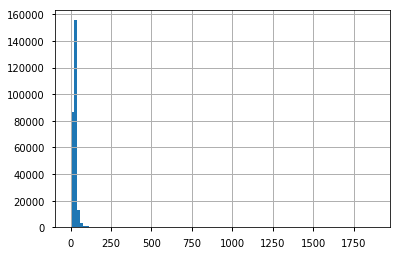

In [6]:
segments.seg_length.hist(bins=100)

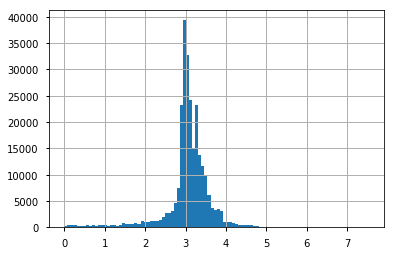

In [7]:
segments.seg_length.apply(np.log).hist(bins=100)

In [8]:
segments.st_time.dtype
#converting date to datetime format
datetime.strptime(segments.st_time.loc[0],'%m/%d/%y %H:%M')

datetime.datetime(2009, 2, 10, 16, 3)

The dateutil package includes a parser that attempts to detect the format of the date strings, and convert them automatically.

In [9]:
from dateutil.parser import parse
parse(segments.st_time.iloc[0])

datetime.datetime(2009, 2, 10, 16, 3)

In [11]:
#converting all the datetime
#segments.st_time.apply(lambda d:datetime.strptime(d, '%m/%d/%y %H:%M'))
pd.to_datetime(segments.st_time[:])

0        2009-02-10 16:03:00
1        2009-04-06 14:31:00
2        2009-04-06 14:36:00
3        2009-04-10 17:58:00
4        2009-04-10 17:59:00
5        2010-03-20 16:06:00
6        2010-03-20 18:05:00
7        2011-05-04 11:28:00
8        2010-06-05 11:23:00
9        2010-06-08 11:03:00
10       2010-06-14 17:07:00
11       2010-06-17 16:35:00
12       2010-07-11 11:51:00
13       2010-07-12 15:33:00
14       2010-07-20 19:23:00
15       2010-09-10 14:00:00
16       2011-03-14 16:13:00
17       2011-03-18 11:18:00
18       2011-04-25 16:37:00
19       2011-05-14 15:51:00
20       2011-05-19 12:34:00
21       2011-05-23 21:29:00
22       2011-05-25 11:46:00
23       2011-06-01 14:32:00
24       2011-06-07 14:43:00
25       2011-08-08 15:42:00
26       2011-09-06 20:59:00
27       2011-09-08 08:22:00
28       2011-09-12 14:56:00
29       2011-10-25 12:52:00
                 ...        
262496   2009-11-22 02:13:00
262497   2009-11-22 02:15:00
262498   2009-12-02 01:46:00
262499   2009-

The read_* functions now have an optional parse_dates argument that try to convert any columns passed to it into datetime format upon import:

In [ ]:
segments = pd.read_csv("transit_segments.csv", parse_dates=['st_time', 'end_time'])
#timeconsuming

In [ ]:
segments.dtypes

Columns of the datetime type have an accessor to easily extract properties of the data type. This will return a Series, with the same row index as the DataFrame

In [ ]:
segments.st_time.dt.month.head()

In [ ]:
segments[segments.st_time.dt.month==2].head()

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
vessels = pd.read_csv("vessel_information.csv", index_col='mmsi')
vessels.head()

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
9,3,000000009/Raven/Shearwater,N,Unknown,Unknown,2,50.0/62.0,62.0,2,Pleasure/Tug
21,1,Us Gov Vessel,Y,Unknown,Unknown,1,208.0,208.0,1,Unknown
74,2,Mcfaul/Sarah Bell,N,Unknown,Unknown,1,155.0,155.0,1,Unknown
103,3,Ron G/Us Navy Warship 103/Us Warship 103,Y,Unknown,Unknown,2,26.0/155.0,155.0,2,Tanker/Unknown


Merging and Joining DataFrame Objects

In [3]:
vessels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10771 entries, 1 to 999999999
Data columns (total 10 columns):
num_names    10771 non-null int64
names        10771 non-null object
sov          10771 non-null object
flag         10771 non-null object
flag_type    10771 non-null object
num_loas     10771 non-null int64
loa          10771 non-null object
max_loa      10771 non-null float64
num_types    10771 non-null int64
type         10771 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 925.6+ KB


In [6]:
[v for v in vessels.type.unique() if v.find('/')==-1]


['Unknown',
 'Other',
 'Tug',
 'Towing',
 'Pleasure',
 'Cargo',
 'WIG',
 'Fishing',
 'BigTow',
 'MilOps',
 'Tanker',
 'Passenger',
 'SAR',
 'Sailing',
 'Reserved',
 'Law',
 'Dredging',
 'AntiPol',
 'Pilot',
 'HSC',
 'Diving',
 'Resol-18',
 'Tender',
 'Spare',
 'Medical']

In [7]:
vessels.type.value_counts()

Cargo                                                                                5622
Tanker                                                                               2440
Pleasure                                                                              601
Tug                                                                                   221
Sailing                                                                               205
Fishing                                                                               200
Other                                                                                 178
Passenger                                                                             150
Towing                                                                                117
Unknown                                                                               106
MilOps                                                                                 82
Cargo/Unkn

Combining tables according to the value of one or more keys that are used to identify rows much like an index

In [13]:
df1=pd.DataFrame(dict(id=range(4),age=np.random.randint(18,31,size=4)))
df2=pd.DataFrame(dict(id=list(range(3))+list(range(3)),score=np.random.random(size=6)))
print(df1)
df2

   age  id
0   18   0
1   27   1
2   29   2
3   22   3


,id,score
0,0,0.662445
1,1,0.154939
2,2,0.918746
3,0,0.607628
4,1,0.308565
5,2,0.084825


In [14]:
pd.merge(df1,df2)

,age,id,score
0,18,0,0.662445
1,18,0,0.607628
2,27,1,0.154939
3,27,1,0.308565
4,29,2,0.918746
5,29,2,0.084825


Notice that without any information about which column to use as a key, Pandas did the right thing and used the id column in both tables. Unless specified otherwise, merge will used any common column names as keys for merging the tables.

Notice also that id=3 from df1 was omitted from the merged table. This is because, by default, merge performs an inner join on the tables, meaning that the merged table represents an intersection of the two tables.

how : {'left', 'right', 'outer', 'inner'}, default 'inner'
<br>

left: use only keys from left frame (SQL: left outer join)
<br>
right: use only keys from right frame (SQL: right outer join)
<br>
outer: use union of keys from both frames (SQL: full outer join)
<br>
inner: use intersection of keys from both frames (SQL: inner join)

In [16]:
pd.merge(df1, df2, how='outer')

,age,id,score
0,18,0,0.662445
1,18,0,0.607628
2,27,1,0.154939
3,27,1,0.308565
4,29,2,0.918746
5,29,2,0.084825
6,22,3,NaN


The outer join above yields the union of the two tables, so all rows are represented, with missing values inserted as appropriate. One can also perform right and left joins to include all rows of the right or left table (i.e. first or second argument to merge), but not necessarily the other.

## Concatenation

In [22]:
np.concatenate([np.random.random(5), np.random.random(5)])

array([0.70043685, 0.66674175, 0.51207704, 0.234969  , 0.55904273,
       0.29235015, 0.66438098, 0.3599379 , 0.41768643, 0.13056488])

In [ ]:
pd.concat([df1,df2],axis=0,join='inner')

In [18]:
#Row wise concatenation
np.r_[np.random.random(5), np.random.random(5)]

array([0.11974038, 0.53828562, 0.47373625, 0.36580809, 0.01242733,
       0.96611554, 0.5331864 , 0.13844634, 0.41681915, 0.69612816])

In [19]:
np.c_[np.random.random(5),np.random.random(5)]

array([[0.49973423, 0.28104362],
       [0.52090108, 0.33484728],
       [0.97136516, 0.40183446],
       [0.00564331, 0.68287666],
       [0.2212391 , 0.25271499]])

Notice that c_ and r_ are not really functions at all, since it is performing some sort of indexing operation, rather than being called. They are actually class instances,This operation is also called binding or stacking.

In [23]:
football=pd.read_csv("results.csv")
football.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [27]:
#Stack method rotates the data frame so that columns are represented in rows
stacked=football.stack()
stacked.head()
#To complement this, unstack pivots from rows back to columns.
stacked.unstack().head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [28]:
foot=football.set_index(['date'])
foot.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral
date,,,,,,,,
1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1873-03-08,England,Scotland,4,2,Friendly,London,England,False
1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
1875-03-06,England,Scotland,2,2,Friendly,London,England,False
1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
